In [1]:
import requests
import pandas as pd
from datetime import datetime
import time


# note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'token'
auth = requests.auth.HTTPBasicAuth('CllfFuOvEOBS09TAzabT9Q', 'UmOCgu0uvbPzHn6bJgPwZ5Yf6Rmx7w')

with open('pw.txt','r') as f:
    pw = f.read().rstrip('\n')
# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': 'dspd1',
        'password': pw}

# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'MyAPI/0.0.1'}

# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# convert response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# add authorization to our headers dictionary
headers['Authorization'] = f'bearer {TOKEN}'

# while the token is valid (~2 hours) we just add headers=headers to our requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

In [2]:
def df_from_response(res):
    # initialize temp dataframe for batch of data in response
    df = pd.DataFrame()

    # loop through each post pulled from res and append to df
    for post in res.json()['data']['children']:
        df = pd.concat([df, pd.Series({
            'subreddit': post['data']['subreddit'],
            'subreddit_name_prefixed': post['data']['subreddit_name_prefixed'],
            'name': post['data']['name'],
            'author': post['data']['author'],
            'title': post['data']['title'],
            'selftext': post['data']['selftext'],
            'upvote_ratio': post['data']['upvote_ratio'],
            'ups': post['data']['ups'],
            'downs': post['data']['downs'],
            'score': post['data']['score'],
            'link_flair_css_class': post['data']['link_flair_css_class'],
            'created_utc': datetime.fromtimestamp(post['data']['created_utc']).strftime('%Y-%m-%dT%H:%M:%SZ'),
            'id': post['data']['id'],
            'kind': post['kind']}).to_frame().T], ignore_index=True)

    return df


# 'approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 
# 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 
# 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'upvote_ratio', 
# 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 
# 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 
# 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 
# 'is_created_from_ads_ui', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 
# 'author_flair_richtext', 'gildings', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type',
# 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftext_html', 
# 'likes', 'suggested_sort', 'banned_at_utc', 'view_count', 'archived', 'no_follow', 'is_crosspostable', 'pinned', 
# 'over_18', 'all_awardings', 'awarders', 'media_only', 'can_gild', 'spoiler', 'locked', 'author_flair_text', 
# 'treatment_tags', 'visited', 'removed_by', 'num_reports', 'distinguished', 'subreddit_id', 'author_is_blocked', 
# 'mod_reason_by', 'removal_reason', 'link_flair_background_color', 'id', 'is_robot_indexable', 'report_reasons', 
# 'author', 'discussion_type', 'num_comments', 'send_replies', 'whitelist_status', 'contest_mode', 'mod_reports', 
# 'author_patreon_flair', 'author_flair_text_color', 'permalink', 'parent_whitelist_status', 'stickied', 'url', 
# 'subreddit_subscribers', 'created_utc', 'num_crossposts', 'media', 'is_video']

In [3]:
sub_reddits=['r/1P_LSD', 'r/2cb', 'r/4acodmt', 'r/adderall', 'r/afinil', 'r/ambien', 'r/AMT', 'r/Ayahuasca', 
'r/cocaine', 'r/cripplingalcoholism', 'r/DMT', 'r/DPH', 'r/dxm', 'r/fentanyl', 'r/ketamine', 'r/kratom', 
'r/LSA', 'r/LSD', 'r/MDMA', 'r/MemantineHCl', 'r/mescaline', 'r/meth', 'r/PCP', 
'r/phenibut', 'r/PsilocybinMushrooms', 'r/Salvia', 'r/shroomers', 'r/shrooms', 
'r/benzodiazepines', 'r/dissociatives', 'r/DissonautUniverse', 'r/gabagoodness', 
'r/microdosing', 'r/noids', 'r/opiates', 'r/Opioid_RCs', 'r/PsychedelicMessages', 
'r/Psychedelics', 'r/PsychedSubstance', 'r/Psychonaut', 'r/RationalPsychonaut', 'r/Stims', 
'r/treedibles', 'r/trees', 'r/tryptonaut', 'r/AnAnswerToHeal', 'r/AskDrugNerds', 'r/askdrugs', 'r/aves', 
'r/bestoferowid', 'r/CurrentlyTripping', 'r/druganalytics', 'r/druggardening', 'r/DrugNerds', 'r/Drugs', 
'r/DrugShowerThoughts', 'r/DrugsOver30', 'r/erowid', 'r/ObscureDrugs', 'r/ReagentTesting', 'r/researchchemicals', 
'r/samelevel', 'r/TheDrugClassroom', 'r/TheeHive', 'r/tripreports', 'r/TripSit', 'r/TripTales']

In [4]:
prev_data = pd.read_csv('reddit.csv')
prev_data.set_index(['subreddit', 'id'], inplace=True)
display(prev_data)

subreddit_name_prefixed        name               author  \
subreddit   id                                                                 
1P_LSD      106f70p                r/1P_LSD  t3_106f70p         iceymannn123   
            105y4cv                r/1P_LSD  t3_105y4cv         VeGaN_B0y_XL   
            105o78p                r/1P_LSD  t3_105o78p         VeGaN_B0y_XL   
            103dkzd                r/1P_LSD  t3_103dkzd     cristobaldelicia   
            103ayfb                r/1P_LSD  t3_103ayfb         Big-Lab-8703   
...                                     ...         ...                  ...   
tripreports o0gyx8            r/tripreports   t3_o0gyx8        Rollablunt667   
            o0go5y            r/tripreports   t3_o0go5y  Over-Elderberry3614   
            nzs5zu            r/tripreports   t3_nzs5zu              CatiaRL   
            nzfizm            r/tripreports   t3_nzfizm        Odd_Spot_3490   
            nz34wf            r/tripreports   t3_nz34wf            Hinata778   

                                                                 title  \
subreddit   id                                                           
1P_LSD      106f70p                      the different isomers of lsd?   
            105y4cv        Trip report on: Tripping and playing soccer   
            105o78p  Currently tripping on acid and my family gents...   
            103dkzd                    Lizard Labs Retail back online?   
            103ayfb  1P-LSD didn't work as intended. Help me unders...   
...                                                                ...   
tripreports o0gyx8                            Question about shrooms !   
            o0go5y                        My crazy McKennaii 4.5G trip   
            nzs5zu                           Bad trip on magic shrooms   
            nzfizm                                            Dmt+n2o?   
            nz34wf                   My first unexpected shroom trip..   

                                                              selftext  \
subreddit   id                                                           
1P_LSD      106f70p  I'm wondering about the chiral compounds of ls...   
            105y4cv  This event occured last year and unfortunately...   
            105o78p                                                NaN   
            103dkzd  I noticed that particular website is back up, ...   
            103ayfb  Hi,\n\nI dropped 150ug 1cP-LSD on the 28th of ...   
...                                                                ...   
tripreports o0gyx8   Hey, i take high psilocybin (magic mushrooms) ...   
            o0go5y   So me and my friend who was my trip sitter wen...   
            nzs5zu   Hi everyone! \nOn Saturday I had my first ever...   
            nzfizm   Doing some whippits and made me think back.......   
            nz34wf   I recently started growing my own shrooms, and...   

                    upvote_ratio   ups  downs  score link_flair_css_class  \
subreddit   id                                                              
1P_LSD      106f70p         0.85   8.0    0.0    8.0                  NaN   
            105y4cv         0.86   5.0    0.0    5.0                  NaN   
            105o78p         0.58   2.0    0.0    2.0                  NaN   
            103dkzd         0.86  16.0    0.0   16.0                  NaN   
            103ayfb          1.0   1.0    0.0    1.0                  NaN   
...                          ...   ...    ...    ...                  ...   
tripreports o0gyx8           1.0  10.0    0.0   10.0                  NaN   
            o0go5y          0.86   5.0    0.0    5.0                  NaN   
            nzs5zu           1.0  31.0    0.0   31.0                  NaN   
            nzfizm          0.84   8.0    0.0    8.0                  NaN   
            nz34wf           1.0  19.0    0.0   19.0                  NaN   

                              created_utc kind  
su

In [5]:
if prev_data.empty:
    load_from_begining = True
else:
    load_from_begining = False
    print("loading delta")

data = pd.DataFrame()
start = time.time()
for sub_reddit in sub_reddits:
    params = {'limit': 100}
    print(sub_reddit)
    if load_from_begining==False:# set the last known data entry
        try:
            params['before'] = prev_data.loc[sub_reddit[2:]].iloc[0]['name']
        except:
            print(f'No {sub_reddit} in data set')
            continue
            
    dig_deeper = True
    i=0
    while dig_deeper:
        i += 1
        dig_deeper = i<=100
        res = requests.get(f'https://oauth.reddit.com/{sub_reddit}/new',
                              headers=headers,
                              params=params)      
        if 'error' in res.json():
            if res.json()['error']==403:
                print(f'private subreddit {sub_reddit}')
            elif res.json()['error']==404:
                reason = res.json()['reason']
                print(f'not found {sub_reddit}, reason {reason}')
            dig_deeper = False
            continue
        

        new_df = df_from_response(res) #create new data frame
        if len(new_df)==0:
            dig_deeper=False
            continue
            
        
        if load_from_begining:
            row = new_df.iloc[-1]             # take the final row (oldest entry)
            # add/update fullname in params
            params['after'] = row['name']
        else:
            row = new_df.iloc[0]              # take the first row (newest entry)
            # add/update fullname in params
            params['before'] = row['name']
            
            
            
#         res = requests.get(f'https://oauth.reddit.com/{sub_reddit}/comments/{id}', 
#                            params={'depth':50}, headers=headers)
#         comments = res.json()[1]['data']['children'][1]['data']['body']
 
        # append new_df to data
        data = pd.concat([data, new_df], ignore_index=True)
end = time.time()
print('time to scrap',end - start)


loading delta
r/1P_LSD
r/2cb
r/4acodmt
r/adderall
r/afinil
r/ambien
r/AMT
r/Ayahuasca
r/cocaine
r/cripplingalcoholism
No r/cripplingalcoholism in data set
r/DMT
r/DPH
r/dxm
r/fentanyl
r/ketamine
r/kratom
r/LSA
r/LSD
r/MDMA
r/MemantineHCl
r/mescaline
r/meth
r/PCP
r/phenibut
r/PsilocybinMushrooms
r/Salvia
r/shroomers
r/shrooms
r/benzodiazepines
r/dissociatives
r/DissonautUniverse
No r/DissonautUniverse in data set
r/gabagoodness
r/microdosing
r/noids
r/opiates
r/Opioid_RCs
r/PsychedelicMessages
r/Psychedelics
r/PsychedSubstance
r/Psychonaut
r/RationalPsychonaut
r/Stims
r/treedibles
r/trees
r/tryptonaut
No r/tryptonaut in data set
r/AnAnswerToHeal
r/AskDrugNerds
r/askdrugs
r/aves
r/bestoferowid
r/CurrentlyTripping
No r/CurrentlyTripping in data set
r/druganalytics
r/druggardening
r/DrugNerds
r/Drugs
r/DrugShowerThoughts
r/DrugsOver30
r/erowid
r/ObscureDrugs
r/ReagentTesting
r/researchchemicals
r/samelevel
r/TheDrugClassroom
r/TheeHive
r/tripreports
r/TripSit
r/TripTales
time to scrap 15.2

In [6]:
data_combined_with_delta = pd.concat([data, prev_data.reset_index()], ignore_index=True)
data_combined_with_delta.sort_values(by=['subreddit', 'created_utc'], ascending=(True,False), inplace=True)
data_combined_with_delta.set_index(['subreddit', 'id'], inplace=True)

display(data_combined_with_delta)

subreddit_name_prefixed        name               author  \
subreddit   id                                                                 
1P_LSD      106f70p                r/1P_LSD  t3_106f70p         iceymannn123   
            105y4cv                r/1P_LSD  t3_105y4cv         VeGaN_B0y_XL   
            105o78p                r/1P_LSD  t3_105o78p         VeGaN_B0y_XL   
            103dkzd                r/1P_LSD  t3_103dkzd     cristobaldelicia   
            103ayfb                r/1P_LSD  t3_103ayfb         Big-Lab-8703   
...                                     ...         ...                  ...   
tripreports o0gyx8            r/tripreports   t3_o0gyx8        Rollablunt667   
            o0go5y            r/tripreports   t3_o0go5y  Over-Elderberry3614   
            nzs5zu            r/tripreports   t3_nzs5zu              CatiaRL   
            nzfizm            r/tripreports   t3_nzfizm        Odd_Spot_3490   
            nz34wf            r/tripreports   t3_nz34wf            Hinata778   

                                                                 title  \
subreddit   id                                                           
1P_LSD      106f70p                      the different isomers of lsd?   
            105y4cv        Trip report on: Tripping and playing soccer   
            105o78p  Currently tripping on acid and my family gents...   
            103dkzd                    Lizard Labs Retail back online?   
            103ayfb  1P-LSD didn't work as intended. Help me unders...   
...                                                                ...   
tripreports o0gyx8                            Question about shrooms !   
            o0go5y                        My crazy McKennaii 4.5G trip   
            nzs5zu                           Bad trip on magic shrooms   
            nzfizm                                            Dmt+n2o?   
            nz34wf                   My first unexpected shroom trip..   

                                                              selftext  \
subreddit   id                                                           
1P_LSD      106f70p  I'm wondering about the chiral compounds of ls...   
            105y4cv  This event occured last year and unfortunately...   
            105o78p                                                NaN   
            103dkzd  I noticed that particular website is back up, ...   
            103ayfb  Hi,\n\nI dropped 150ug 1cP-LSD on the 28th of ...   
...                                                                ...   
tripreports o0gyx8   Hey, i take high psilocybin (magic mushrooms) ...   
            o0go5y   So me and my friend who was my trip sitter wen...   
            nzs5zu   Hi everyone! \nOn Saturday I had my first ever...   
            nzfizm   Doing some whippits and made me think back.......   
            nz34wf   I recently started growing my own shrooms, and...   

                    upvote_ratio   ups downs score link_flair_css_class  \
subreddit   id                                                            
1P_LSD      106f70p         0.85   8.0   0.0   8.0                  NaN   
            105y4cv         0.86   5.0   0.0   5.0                  NaN   
            105o78p         0.58   2.0   0.0   2.0                  NaN   
            103dkzd         0.86  16.0   0.0  16.0                  NaN   
            103ayfb          1.0   1.0   0.0   1.0                  NaN   
...                          ...   ...   ...   ...                  ...   
tripreports o0gyx8           1.0  10.0   0.0  10.0                  NaN   
            o0go5y          0.86   5.0   0.0   5.0                  NaN   
            nzs5zu           1.0  31.0   0.0  31.0                  NaN   
            nzfizm          0.84   8.0   0.0   8.0                  NaN   
            nz34wf           1.0  19.0   0.0  19.0                  NaN   

                              created_utc kind  
subreddit   id              

In [7]:
data_combined_with_delta.groupby('subreddit').count()['title'].max()

2440

In [8]:
data_combined_with_delta.to_csv('reddit.csv')  
display(data_combined_with_delta)

subreddit_name_prefixed        name               author  \
subreddit   id                                                                 
1P_LSD      106f70p                r/1P_LSD  t3_106f70p         iceymannn123   
            105y4cv                r/1P_LSD  t3_105y4cv         VeGaN_B0y_XL   
            105o78p                r/1P_LSD  t3_105o78p         VeGaN_B0y_XL   
            103dkzd                r/1P_LSD  t3_103dkzd     cristobaldelicia   
            103ayfb                r/1P_LSD  t3_103ayfb         Big-Lab-8703   
...                                     ...         ...                  ...   
tripreports o0gyx8            r/tripreports   t3_o0gyx8        Rollablunt667   
            o0go5y            r/tripreports   t3_o0go5y  Over-Elderberry3614   
            nzs5zu            r/tripreports   t3_nzs5zu              CatiaRL   
            nzfizm            r/tripreports   t3_nzfizm        Odd_Spot_3490   
            nz34wf            r/tripreports   t3_nz34wf            Hinata778   

                                                                 title  \
subreddit   id                                                           
1P_LSD      106f70p                      the different isomers of lsd?   
            105y4cv        Trip report on: Tripping and playing soccer   
            105o78p  Currently tripping on acid and my family gents...   
            103dkzd                    Lizard Labs Retail back online?   
            103ayfb  1P-LSD didn't work as intended. Help me unders...   
...                                                                ...   
tripreports o0gyx8                            Question about shrooms !   
            o0go5y                        My crazy McKennaii 4.5G trip   
            nzs5zu                           Bad trip on magic shrooms   
            nzfizm                                            Dmt+n2o?   
            nz34wf                   My first unexpected shroom trip..   

                                                              selftext  \
subreddit   id                                                           
1P_LSD      106f70p  I'm wondering about the chiral compounds of ls...   
            105y4cv  This event occured last year and unfortunately...   
            105o78p                                                NaN   
            103dkzd  I noticed that particular website is back up, ...   
            103ayfb  Hi,\n\nI dropped 150ug 1cP-LSD on the 28th of ...   
...                                                                ...   
tripreports o0gyx8   Hey, i take high psilocybin (magic mushrooms) ...   
            o0go5y   So me and my friend who was my trip sitter wen...   
            nzs5zu   Hi everyone! \nOn Saturday I had my first ever...   
            nzfizm   Doing some whippits and made me think back.......   
            nz34wf   I recently started growing my own shrooms, and...   

                    upvote_ratio   ups downs score link_flair_css_class  \
subreddit   id                                                            
1P_LSD      106f70p         0.85   8.0   0.0   8.0                  NaN   
            105y4cv         0.86   5.0   0.0   5.0                  NaN   
            105o78p         0.58   2.0   0.0   2.0                  NaN   
            103dkzd         0.86  16.0   0.0  16.0                  NaN   
            103ayfb          1.0   1.0   0.0   1.0                  NaN   
...                          ...   ...   ...   ...                  ...   
tripreports o0gyx8           1.0  10.0   0.0  10.0                  NaN   
            o0go5y          0.86   5.0   0.0   5.0                  NaN   
            nzs5zu           1.0  31.0   0.0  31.0                  NaN   
            nzfizm          0.84   8.0   0.0   8.0                  NaN   
            nz34wf           1.0  19.0   0.0  19.0                  NaN   

                              created_utc kind  
subreddit   id              

In [33]:
data_combined_with_delta['year_month'] = pd.to_datetime(data_combined_with_delta['created_utc']).dt.strftime('%Y-%m')


In [34]:
data_combined_with_delta['year_month'] 

subreddit    id     
1P_LSD       106f70p    2023-01
             105y4cv    2023-01
             105o78p    2023-01
             103dkzd    2023-01
             103ayfb    2023-01
                         ...   
tripreports  o0gyx8     2021-06
             o0go5y     2021-06
             nzs5zu     2021-06
             nzfizm     2021-06
             nz34wf     2021-06
Name: year_month, Length: 65554, dtype: object

In [35]:
drug_kwrds = {'carfentanil':'carfentanil|carfent',
              'U-47700':'u4|u-4|u47|U-44770|47700',
             'Eutylone': 'Eutylone',
             'Flualprazolam': 'Flualprazolam|ﬂualp',
             'N-Ethylpentylone': 'N-Ethylpentylone|Ephylone|bk-EBDP|ephylone',
             '5F-MDMB-PICA': '5F-MDMB-PICA|MDMB-2201',
             'Isotonitazene':'Isotonitazene',
             'Brorphine':'Brorphine'}

In [36]:
drug_kwrds['U-47700']

'u4|u-4|u47|U-44770|47700'

In [37]:
import re
text_to_analyse = data_combined_with_delta['title'] + data_combined_with_delta['selftext'].fillna('')
data_combined_with_delta['cntr'] = text_to_analyse.str.count(drug_kwrds['U-47700'], flags=re.IGNORECASE)


In [42]:
display(data_combined_with_delta)

subreddit_name_prefixed        name               author  \
subreddit   id                                                                 
1P_LSD      106f70p                r/1P_LSD  t3_106f70p         iceymannn123   
            105y4cv                r/1P_LSD  t3_105y4cv         VeGaN_B0y_XL   
            105o78p                r/1P_LSD  t3_105o78p         VeGaN_B0y_XL   
            103dkzd                r/1P_LSD  t3_103dkzd     cristobaldelicia   
            103ayfb                r/1P_LSD  t3_103ayfb         Big-Lab-8703   
...                                     ...         ...                  ...   
tripreports o0gyx8            r/tripreports   t3_o0gyx8        Rollablunt667   
            o0go5y            r/tripreports   t3_o0go5y  Over-Elderberry3614   
            nzs5zu            r/tripreports   t3_nzs5zu              CatiaRL   
            nzfizm            r/tripreports   t3_nzfizm        Odd_Spot_3490   
            nz34wf            r/tripreports   t3_nz34wf            Hinata778   

                                                                 title  \
subreddit   id                                                           
1P_LSD      106f70p                      the different isomers of lsd?   
            105y4cv        Trip report on: Tripping and playing soccer   
            105o78p  Currently tripping on acid and my family gents...   
            103dkzd                    Lizard Labs Retail back online?   
            103ayfb  1P-LSD didn't work as intended. Help me unders...   
...                                                                ...   
tripreports o0gyx8                            Question about shrooms !   
            o0go5y                        My crazy McKennaii 4.5G trip   
            nzs5zu                           Bad trip on magic shrooms   
            nzfizm                                            Dmt+n2o?   
            nz34wf                   My first unexpected shroom trip..   

                                                              selftext  \
subreddit   id                                                           
1P_LSD      106f70p  I'm wondering about the chiral compounds of ls...   
            105y4cv  This event occured last year and unfortunately...   
            105o78p                                                NaN   
            103dkzd  I noticed that particular website is back up, ...   
            103ayfb  Hi,\n\nI dropped 150ug 1cP-LSD on the 28th of ...   
...                                                                ...   
tripreports o0gyx8   Hey, i take high psilocybin (magic mushrooms) ...   
            o0go5y   So me and my friend who was my trip sitter wen...   
            nzs5zu   Hi everyone! \nOn Saturday I had my first ever...   
            nzfizm   Doing some whippits and made me think back.......   
            nz34wf   I recently started growing my own shrooms, and...   

                    upvote_ratio   ups downs score link_flair_css_class  \
subreddit   id                                                            
1P_LSD      106f70p         0.85   8.0   0.0   8.0                  NaN   
            105y4cv         0.86   5.0   0.0   5.0                  NaN   
            105o78p         0.58   2.0   0.0   2.0                  NaN   
            103dkzd         0.86  16.0   0.0  16.0                  NaN   
            103ayfb          1.0   1.0   0.0   1.0                  NaN   
...                          ...   ...   ...   ...                  ...   
tripreports o0gyx8           1.0  10.0   0.0  10.0                  NaN   
            o0go5y          0.86   5.0   0.0   5.0                  NaN   
            nzs5zu           1.0  31.0   0.0  31.0                  NaN   
            nzfizm          0.84   8.0   0.0   8.0                  NaN   
            nz34wf           1.0  19.0   0.0  19.0                  NaN   

                              created_utc kind  cntr year_month  
subreddit  

In [43]:
drug_mentions = data_combined_with_delta.groupby('year_month').sum()

<AxesSubplot:xlabel='year_month', ylabel='cntr'>

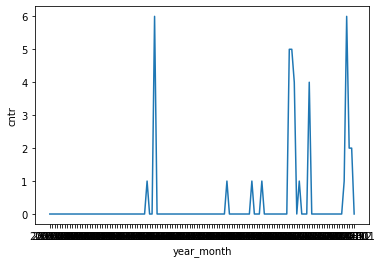

In [45]:
import seaborn as sns
sns.lineplot(data=drug_mentions, x="year_month", y="cntr")